In [1]:
import requests
import numpy as np
import pandas as pd

In [2]:
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        url_data = response.json()
    else:
        print(f"Request failed with status code {response.status_code}")

    return url_data

stint = get_data("https://api.openf1.org/v1/stints")

In [3]:
df = pd.DataFrame(stint)

In [4]:
df.head(10)

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1140,7763,1,4,1.0,2.0,MEDIUM,7.0
1,1140,7763,1,20,1.0,2.0,MEDIUM,10.0
2,1140,7763,1,2,1.0,3.0,SOFT,15.0
3,1140,7763,1,14,1.0,3.0,MEDIUM,0.0
4,1140,7763,1,24,1.0,3.0,MEDIUM,10.0
5,1140,7763,1,11,1.0,4.0,TEST_UNKNOWN,0.0
6,1140,7763,1,16,1.0,4.0,MEDIUM,0.0
7,1140,7763,1,22,1.0,4.0,MEDIUM,12.0
8,1140,7763,1,63,1.0,4.0,MEDIUM,11.0
9,1140,7763,1,31,1.0,5.0,MEDIUM,5.0


In [5]:
df.shape

(23232, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23232 entries, 0 to 23231
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meeting_key        23232 non-null  int64  
 1   session_key        23232 non-null  int64  
 2   stint_number       23232 non-null  int64  
 3   driver_number      23232 non-null  int64  
 4   lap_start          23126 non-null  float64
 5   lap_end            23126 non-null  float64
 6   compound           23228 non-null  object 
 7   tyre_age_at_start  23231 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.4+ MB


In [7]:
df['compound'].value_counts()

,count
compound,
SOFT,10953
MEDIUM,7443
HARD,2999
INTERMEDIATE,1251
TEST_UNKNOWN,259
WET,208
UNKNOWN,115


In [8]:
df.dropna(subset=['compound'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23228 entries, 0 to 23231
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meeting_key        23228 non-null  int64  
 1   session_key        23228 non-null  int64  
 2   stint_number       23228 non-null  int64  
 3   driver_number      23228 non-null  int64  
 4   lap_start          23122 non-null  float64
 5   lap_end            23122 non-null  float64
 6   compound           23228 non-null  object 
 7   tyre_age_at_start  23228 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ MB


In [9]:
df = df[~df['compound'].isin(['TEST_UNKNOWN', 'UNKNOWN'])]
df['compound'].value_counts()

,count
compound,
SOFT,10953
MEDIUM,7443
HARD,2999
INTERMEDIATE,1251
WET,208


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22854 entries, 0 to 23231
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meeting_key        22854 non-null  int64  
 1   session_key        22854 non-null  int64  
 2   stint_number       22854 non-null  int64  
 3   driver_number      22854 non-null  int64  
 4   lap_start          22797 non-null  float64
 5   lap_end            22797 non-null  float64
 6   compound           22854 non-null  object 
 7   tyre_age_at_start  22854 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ MB


In [11]:
df['lap_end'].mode()

,lap_end
0,7.0


In [12]:
df['lap_start'].mode()

,lap_start
0,1.0


In [13]:
df.fillna({'lap_end': 7}, inplace=True)
df.fillna({'lap_start': 1}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22854 entries, 0 to 23231
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meeting_key        22854 non-null  int64  
 1   session_key        22854 non-null  int64  
 2   stint_number       22854 non-null  int64  
 3   driver_number      22854 non-null  int64  
 4   lap_start          22854 non-null  float64
 5   lap_end            22854 non-null  float64
 6   compound           22854 non-null  object 
 7   tyre_age_at_start  22854 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ MB


### One-hot Encoding

In [14]:
compound_dummies = pd.get_dummies(df['compound'], prefix='compound', dtype = 'int')
df = pd.concat([df.drop('compound', axis=1), compound_dummies], axis=1)
df.columns

Index(['meeting_key', 'session_key', 'stint_number', 'driver_number',
       'lap_start', 'lap_end', 'tyre_age_at_start', 'compound_HARD',
       'compound_INTERMEDIATE', 'compound_MEDIUM', 'compound_SOFT',
       'compound_WET'],
      dtype='object')

In [15]:
df.head(10)

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,tyre_age_at_start,compound_HARD,compound_INTERMEDIATE,compound_MEDIUM,compound_SOFT,compound_WET
0,1140,7763,1,4,1.0,2.0,7.0,0,0,1,0,0
1,1140,7763,1,20,1.0,2.0,10.0,0,0,1,0,0
2,1140,7763,1,2,1.0,3.0,15.0,0,0,0,1,0
3,1140,7763,1,14,1.0,3.0,0.0,0,0,1,0,0
4,1140,7763,1,24,1.0,3.0,10.0,0,0,1,0,0
6,1140,7763,1,16,1.0,4.0,0.0,0,0,1,0,0
7,1140,7763,1,22,1.0,4.0,12.0,0,0,1,0,0
8,1140,7763,1,63,1.0,4.0,11.0,0,0,1,0,0
9,1140,7763,1,31,1.0,5.0,5.0,0,0,1,0,0
10,1140,7763,1,81,1.0,5.0,0.0,0,0,1,0,0


In [16]:
df.to_excel(f"stint_full_data.xlsx", index=False)

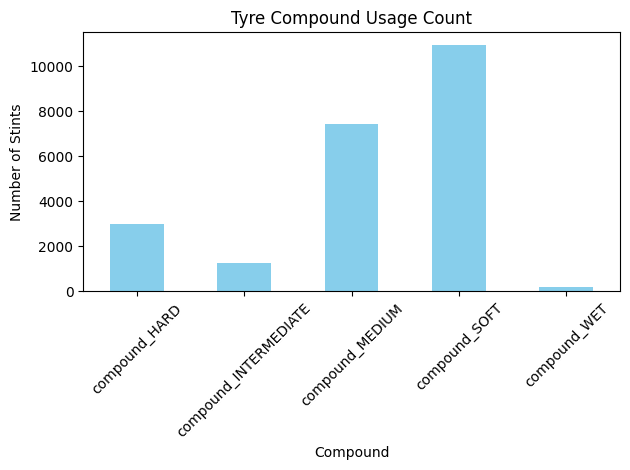

In [17]:
import matplotlib.pyplot as plt

compound_cols = ['compound_HARD', 'compound_INTERMEDIATE', 'compound_MEDIUM', 'compound_SOFT', 'compound_WET']
compound_counts = df[compound_cols].sum()

compound_counts.plot(kind='bar', color='skyblue')
plt.title("Tyre Compound Usage Count")
plt.xlabel("Compound")
plt.ylabel("Number of Stints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


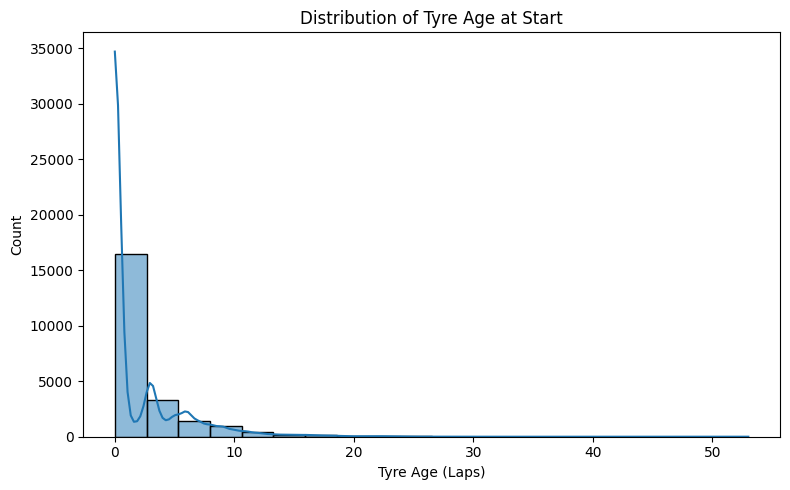

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['tyre_age_at_start'], bins=20, kde=True)
plt.title("Distribution of Tyre Age at Start")
plt.xlabel("Tyre Age (Laps)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


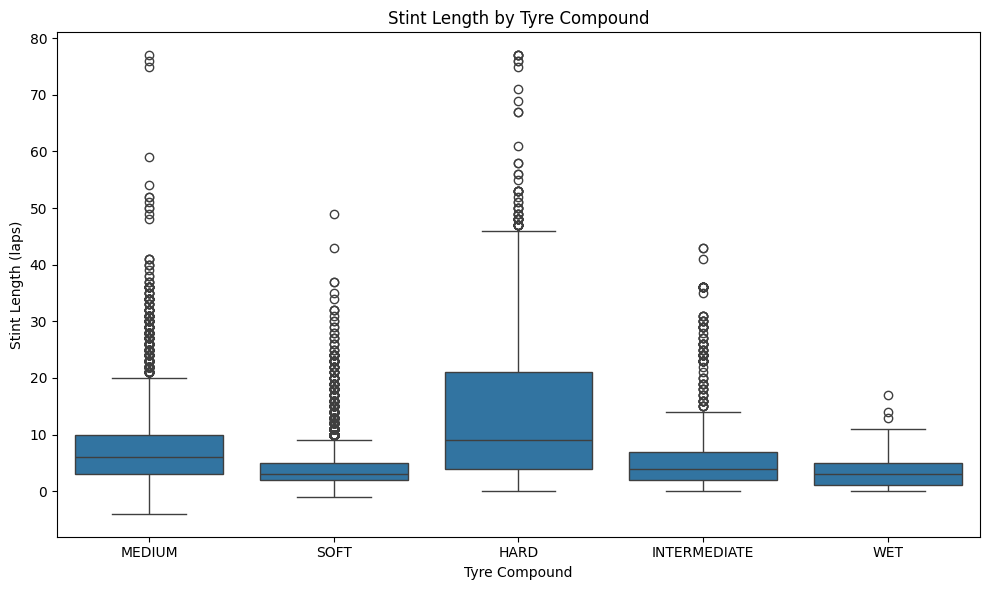

In [19]:
df['stint_length'] = df['lap_end'] - df['lap_start']

for comp in compound_cols:
    df.loc[df[comp] == 1, 'compound'] = comp.replace('compound_', '')

plt.figure(figsize=(10, 6))
sns.boxplot(x='compound', y='stint_length', data=df)
plt.title("Stint Length by Tyre Compound")
plt.xlabel("Tyre Compound")
plt.ylabel("Stint Length (laps)")
plt.tight_layout()
plt.show()


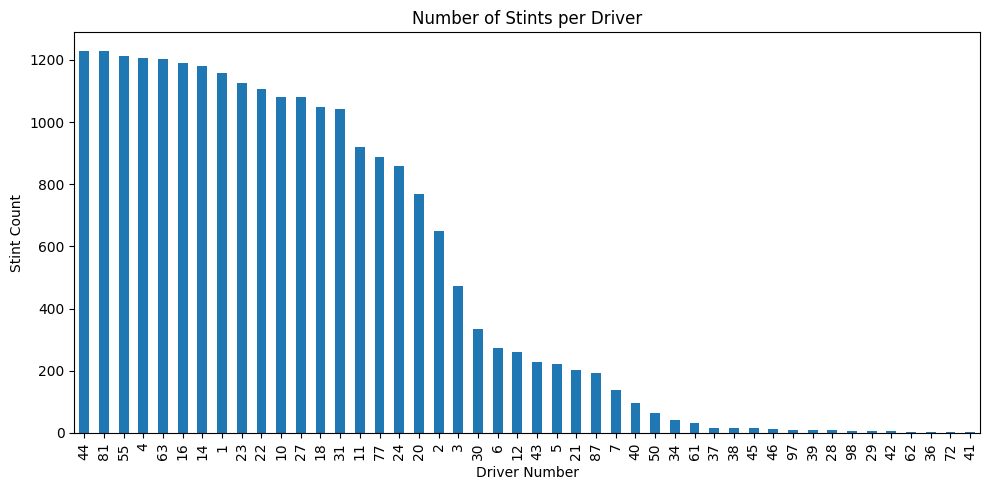

In [20]:
driver_stints = df['driver_number'].value_counts()

plt.figure(figsize=(10, 5))
driver_stints.plot(kind='bar')
plt.title("Number of Stints per Driver")
plt.xlabel("Driver Number")
plt.ylabel("Stint Count")
plt.tight_layout()
plt.show()


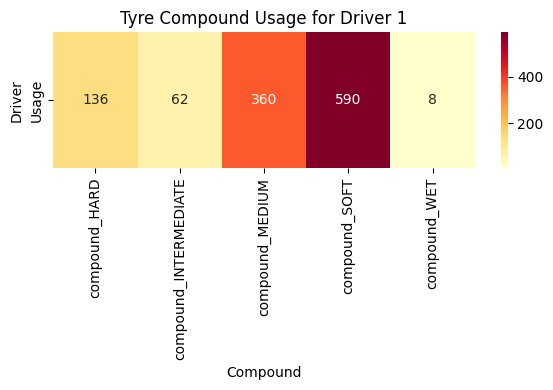

In [24]:
driver_id = 1
single_driver_usage = df[df['driver_number'] == driver_id][compound_cols].sum().to_frame(name='Usage')

plt.figure(figsize=(6, 4))
sns.heatmap(single_driver_usage.T, annot=True, fmt='g', cmap='YlOrRd')
plt.title(f"Tyre Compound Usage for Driver {driver_id}")
plt.xlabel("Compound")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()
